<h1>Project - Wrangle and Analyze Data</h1>

<h3>Introduction :</h3>

There are some important task which I have to perform :
1. Data Wrangling : In that we work on Gathering data, Assessing data, Cleaning data.
2. Then Storing, analyzing, and visualizing the data
3. Report

<h4>1. Gathering data</h4>
    

First download the twitter data(twitter_archive_enhanced.csv). I Download this file manually from the Udacity Resources.

In [1]:
#Import the packages needed for this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json

import matplotlib.pyplot as plt
%matplotlib inline
import re

<h4>Gathering data</h4>

In [2]:
#Load the twitter-archive-enhanced csv file
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#checking the shape of the dataset
df_twitter_archive.shape

(2356, 17)

In [4]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#load and Read image-predictions TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
#setting up the authonticated
auth = tweepy.OAuthHandler('FlsM4oQMihdUr393aLyTBuIKo', 'wUxkuxMdEXXQvZJwguujSUuVjqiOEQBMun16ImMYL8Th5QcuhE')
auth.set_access_token('3220148792-ijph7DkqRkVqHbPLgTukq87OB4cUIWwdjG190R1', '0xtuBYjl9D9hXh3ifTiYVfWPDWhsmTKzCxy3XKNtK3auL')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


<h4>Twitter API and JSON</h4>

In [6]:
list_of_tweets = []
# Tweets that not found :
tweets_ids = []
for tweet_id in df_twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_ids.append(tweet_id)

Rate limit reached. Sleeping for: 742
Rate limit reached. Sleeping for: 742


In [7]:
len(list_of_tweets)

2331

In [8]:
len(tweets_ids)

25

**Observation :**
> We have list of tweets correctly 2331 and the error tweet ids is 25.

In [9]:
list_dicts = []
for each_json_tweet in list_of_tweets:
    list_dicts.append(each_json_tweet)

In [10]:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_dicts, indent=4))

In [11]:
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id'] #id
        favorite_count = each_dictionary['favorite_count'] #favorite_count
        retweet_count = each_dictionary['retweet_count'] #retweet_count

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)
                            })
        df_tweet_json_file = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

<h3>2. Assessing data</h3>

In [12]:
df_tweet_json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [13]:
df_tweet_json_file.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35683,7546
1,892177421306343426,30862,5593
2,891815181378084864,23199,3707
3,891689557279858688,38986,7727
4,891327558926688256,37240,8326


In [14]:
df_tweet_json_file.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7456.888460,2652.471042
std,11577.008495,4485.988810
min,0.000000,1.000000
25%,1297.000000,537.000000
50%,3243.000000,1241.000000
75%,9135.000000,3080.000000
max,153864.000000,76228.000000


In [15]:
df_tweet_json_file.duplicated().sum()

0

In [16]:
df_tweet_json_file['retweet_count'].nunique()

1678

**Observation :**
> 1. Overall my point of view It looks good.
2. The table should be merged togerther based on tweet id.
3. Also tweet_id should be string instead of integer.(erroneous datatypes)

**Quality Issues :**
>1. erroneous datatypes (tweet_id should be string instead of integer)

In [17]:
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**Observation :**
> As we can see above there are four columns and only one variable i.e (doggo, floofer, pupper and puppo).

In [18]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**Observations :**
> **df_twitter_archieve**
1. Missing data or NaN values in 'in_reply_to_status_id', 'in_reply_to_user_id' so removing retweets columns and keep originals - 'retweeted_status_id',retweeted_status_user_id','retweeted_status_timestamp'
2. We will look for NaN data.


In [20]:
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [21]:
df_twitter_archive[df_twitter_archive['rating_denominator'] != 10].count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

In [22]:
df_twitter_archive[df_twitter_archive['rating_numerator'] < 10].count()

tweet_id                      440
in_reply_to_status_id          12
in_reply_to_user_id            12
timestamp                     440
source                        440
text                          440
retweeted_status_id             9
retweeted_status_user_id        9
retweeted_status_timestamp      9
expanded_urls                 430
rating_numerator              440
rating_denominator            440
name                          440
doggo                         440
floofer                       440
pupper                        440
puppo                         440
dtype: int64

In [23]:
df_twitter_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [24]:
df_twitter_archive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [25]:
df_twitter_archive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [26]:
df_twitter_archive['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [27]:
df_twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Buddy         7
an            7
Bailey        7
Toby          7
Scout         6
Koda          6
Leo           6
Oscar         6
Milo          6
Jack          6
Bella         6
Stanley       6
Jax           6
Dave          6
Rusty         6
Bentley       5
           ... 
Gustaf        1
Harrison      1
Margo         1
Amy           1
Glacier       1
Iggy          1
Puff          1
Sailer        1
Monty         1
Grady         1
Ginger        1
Tonks         1
Randall       1
Katie         1
Ralphy        1
Mookie        1
Lugan         1
Jeremy        1
Smiley        1
Burt          1
Banjo         1
William       1
DonDon        1
Shikha        1
Juckson       1
Jackie        1
Koko          1
Ben           1
Jeffrie       1
Bronte        1
Name: name, Length: 957,

In [28]:
len(df_twitter_archive[df_twitter_archive.tweet_id.duplicated()])

0

**Observation :**
> 1. So about rating in numerators are under a score of 10 and some of the rating denominator are not equal to the score.
2. Also there are some spelling corrections menas incorrect names.

In [29]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**Image Prediction:**
1. Normal data with uses upper and lower cases also the _

In [32]:
image_prediction.isna().sum().any()

False

In [33]:
sum(image_prediction.jpg_url.duplicated())

66

In [34]:
image_prediction.tweet_id.nunique()

2075

**Note :**
>Now from above checking and ensuring that all images or pictures are the dogs...

In [35]:
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
#now seperating the non-dog images from p1_dog
n_p1_dog = (image_prediction.p1_dog == False).sum()

In [37]:
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [38]:
#now seperating the non-dog images from p2_dog
n_p2_dog = (image_prediction.p2_dog == False).sum()

In [39]:
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [40]:
#now seperating the non-dog images from p3_dog
n_p3_dog = (image_prediction.p3_dog == False).sum()

**Next_task**
> Now adding all the non-dog images

In [41]:
n_dog = n_p1_dog + n_p2_dog + n_p3_dog
print(n_dog)

1641


In [42]:
print("Values of P1 in the image prediction :\n",image_prediction.p1.value_counts())
print('* '*50)
print("Values of P2 in the image prediction :\n",image_prediction.p2.value_counts())
print('* '*50)
print("Values of P3 in the image prediction :\n",image_prediction.p3.value_counts())
print('* '*50)

Values of P1 in the image prediction :
 golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Ita

In [43]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Observation :**
>1. There are total 1641 images in the image_prediction dataset


>**Tidiness :**
Join image_prediction and tweet_data tables to the twitter_archive table in one dataset called master_archive.

**Summerize above the quality and the tidiness issue :**

**Quality :**
>**Twitter_archive** :
* Erroneous datatypes (tweet_id and timestamp columns).
* I observed that Table contains retweets.
* Rating numerators are under a score of 10 sometimes.
* Rating denominators are not equal to a score of 10 sometimes.
* Also there are some spelling corrections menas incorrect names.
* Source column is not meaningful.

**image_prediction :**
* Erroneous datatypes (tweet_id should be string instead of integer).
* Dataset contains retweets (duplicated jpg_url).
* Prediction names are uppercase sometimes, lowercase other times.
* Pictures in this table that are not dogs.

**Twitter_api :**
* Erroneous datatypes

**Tidiness :**
* Four variables in nine columns (prediction number, prediction value, prediction confidence and whether it is a dog). One variables in four columns (doggo, floofer, pupper and puppo).
* Tables should be merged togerther based on tweet ids.

<h3>3. Data Cleaning </h3>

Now we will execute all the trimming, cleaning and modifying necessary to prepare the data to be analyzed.

**Define**

> Copying All the data to other

**code**

In [44]:
twitter_archive_clean = df_twitter_archive.copy()
image_clean = image_prediction.copy()
tweet_clean_api = df_tweet_json_file.copy()

**Test**

In [45]:
twitter_archive_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [46]:
tweet_clean_api.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

In [47]:
tweet_clean_api['tweet_id'] = tweet_clean_api['tweet_id'].astype('int64')

**Define**

Now merging twitter archieve data and tweet data.

**Code**

In [48]:
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = tweet_clean_api, left_on='tweet_id', right_on='tweet_id', how='inner')

In [49]:
twitter_archive_clean = twitter_archive_clean.merge(image_clean, on='tweet_id', how='inner')

**Test**

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorite_count                2059 

In [51]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


>First convert tweet_id from integer to string for all the tables :)

**Define :**

Finding the quality issue in tweeter archive data so starting from retweet info which have 3 columns etweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as we can see above in info()

**Code :**

In [52]:
retweets = twitter_archive_clean.loc[twitter_archive_clean['retweeted_status_id'].notnull()]
#drop these lines from the table
twitter_archive_clean = twitter_archive_clean.drop(retweets.index, axis=0)

**Test :**

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
favorite_count                1987 non

>As we can see the issue is solved...

**Define :**
>In the twitter archive data there are lots of columns have non-null value we settle those columns menas remove all the replies from those columns.

**Code :**

In [54]:
rm_replies = twitter_archive_clean.loc[twitter_archive_clean['in_reply_to_status_id'].notnull()]
#drop those lines from the columns
twitter_archive_clean = twitter_archive_clean.drop(rm_replies.index, axis=0) #row wise removed all the non-null values from the table

**Test :**

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
favorite_count                1964 non-n

>As we can see the issue is solved

**Tidiness Issue**
>Now Next step is removing all the unnecessary columns from the table like **retweets** (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.) and **replies** (in_reply_to_status_id and in_reply_to_user_id.)

**Code :**

**Test :**

In [56]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)
print(twitter_archive_clean.info())
print('* '*50)
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)
print(twitter_archive_clean.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                 1964 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                1964 non-null object
source                   1964 non-null object
text                     1964 non-null object
expanded_urls            1964 non-null object
rating_numerator         1964 non-null int64
rating_denominator       1964 non-null int64
name                     1964 non-null object
doggo                    1964 non-null object
floofer                  1964 non-null object
pupper                   1964 non-null object
puppo                    1964 non-null object
favorite_count           1964 non-null int64
retweet_count            1964 non-null int64
jpg_url                  1964 non-null object
img_num                  1964 non-null int64
p1                       1964 non-null object
p1_conf                  1964

>We did it we solved the issue

Issue :
>As we can see above there are some missing values available inthe **expanded_urls** colmns so we need to fix it...

**Code**

In [57]:
find_the_missing_values = twitter_archive_clean['expanded_urls'].isna()
twitter_archive_clean[find_the_missing_values]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


>Found 3 rows so we need to remove them...

In [58]:
first_row = twitter_archive_clean[twitter_archive_clean['tweet_id'] == 828361771580813312]
twitter_archive_clean = twitter_archive_clean.drop(first_row.index, axis=0)

second_row = twitter_archive_clean[twitter_archive_clean['tweet_id'] == 785515384317313025]
twitter_archive_clean = twitter_archive_clean.drop(second_row.index, axis=0)

third_row = twitter_archive_clean[twitter_archive_clean['tweet_id'] == 696518437233913856]
twitter_archive_clean = twitter_archive_clean.drop(third_row.index, axis=0)

print('* '*50)
twitter_archive_clean.info()
print('* '*50)

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 25 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1

**Test :**

In [59]:
sum(twitter_archive_clean['expanded_urls'].isna())

0

>As we can see the issue is solved :)

**Tidiness Issue**
>Now combining all 4 columns into one so creating the new seperate columns for dog categories...

**Code :**

In [60]:
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [61]:
#now creating new one column..
twitter_archive_clean['four_dogs'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

#new_col = four_dogs
twitter_archive_clean['four_dogs'].value_counts()

                1662
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: four_dogs, dtype: int64

In [62]:
#now filing/replacing all the non-null values to NAN
twitter_archive_clean.loc[twitter_archive_clean.four_dogs == '', 'four_dogs'] = np.nan
twitter_archive_clean['four_dogs'] = twitter_archive_clean['four_dogs'].fillna('Unknown')

In [63]:
twitter_archive_clean = twitter_archive_clean.drop(['pupper','doggo','puppo','floofer'], axis = 1)
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'four_dogs']

>The quality Issue has been solved 

In [64]:
twitter_archive_clean['four_dogs'] = twitter_archive_clean['four_dogs'].astype('category')

**Test :**

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool

**Define :**

Fix the rating of Numerators and Denominators :
    

**Code :**

In [66]:
twitter_archive_clean['rating_clean'] = twitter_archive_clean.text.str.extract('(\d+(\.\d+)?\/(10))')[0] # extract fractions with a denominator of 10

In [67]:
# split ratings into numerators and denominators
twitter_rating_clean = twitter_archive_clean['rating_clean'].str.split('/', 1, expand=True)
twitter_archive_clean['rating_num_clean'] = twitter_rating_clean[0].astype(np.float64)
twitter_archive_clean['rating_den_clean'] = twitter_rating_clean[1].astype(np.float64)

**Quality issue:**
>Now we going to remove ratings that have high numerators and denominators, it give us problem for analysis so we remove it.

In [68]:
twitter_archive_clean.dropna(subset = ['rating_num_clean'], inplace=True)

**Test :**

In [69]:
# reset column width to show full text
pd.set_option('display.max_colwidth', 4000)

# check rating numerators
twitter_archive_clean.query('rating_num_clean != rating_numerator')[['name', 'text', 'rating_numerator', 'rating_num_clean']]

,name,text,rating_numerator,rating_num_clean
40,Bella,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,13.50
548,Logan,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,9.75
603,Sophie,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,11.27
863,None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,14.00
954,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,13.00
988,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,11.00
1392,Darrel,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,10.00
1438,None,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,11.26
2038,an,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,9.00


In [70]:
twitter_archive_clean.query('rating_num_clean < 10')[['text', 'rating_num_clean']].sample(20)

,text,rating_num_clean
2025,Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM,6.0
2002,Here we have a Hufflepuff. Loves vest. Eyes wide af. Flaccid tail. Matches carpet. Always a little blurry. 8/10 https://t.co/7JdgVqDnvR,8.0
1481,Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe,6.0
1574,Rare shielded battle dog here. Very happy about abundance of lettuce. Painfully slow fetcher. Still petable. 5/10 https://t.co/C3tlKVq7eO,5.0
725,Teagan reads entire books in store so they're free. Loved 50 Shades of Grey (how dare I make that joke so late) 9/10 https://t.co/l46jwv5WYv,9.0
2038,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0
1986,This is Genevieve. She is a golden retriever cocktail mix. Comfortable close to wall. Shows no emotions. 9/10 https://t.co/azEoGqVonH,9.0
1398,"I know we joke around on here, but this is getting really frustrating. We rate dogs. Not T-Rex. Thank you... 8/10 https://t.co/5aFw7SWyxU",8.0
1863,Special dog here. Pretty big. Neck kinda long for dog. Cool spots. Must be a Dalmatian variant. 6/10 would still pet https://t.co/f8GXeDbFzu,6.0
1461,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,7.0


In [71]:
twitter_archive_clean.query('rating_den_clean != 10')[['name', 'text', 'rating_den_clean']]

,name,text,rating_den_clean


In [72]:
# drop original rating columns
twitter_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

**Code**

**Test :**

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id            1952 non-null int64
timestamp           1952 non-null object
source              1952 non-null object
text                1952 non-null object
expanded_urls       1952 non-null object
name                1952 non-null object
favorite_count      1952 non-null int64
retweet_count       1952 non-null int64
jpg_url             1952 non-null object
img_num             1952 non-null int64
p1                  1952 non-null object
p1_conf             1952 non-null float64
p1_dog              1952 non-null bool
p2                  1952 non-null object
p2_conf             1952 non-null float64
p2_dog              1952 non-null bool
p3                  1952 non-null object
p3_conf             1952 non-null float64
p3_dog              1952 non-null bool
four_dogs           1952 non-null category
rating_clean        1952 non-null object
rating_num_clean    1952 non-null flo

In [78]:
twitter_archive_clean['rating_num_clean'] = twitter_archive_clean['rating_num_clean'].astype('int64')

<h2>Exploratory Data Analysis</h2>

In [74]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

**Q1. which is Most Popular breed**

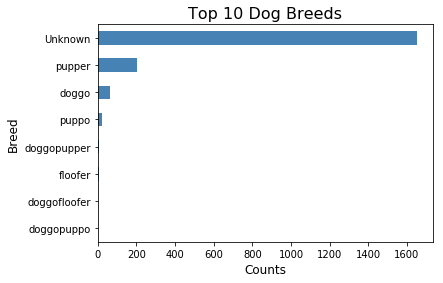

In [75]:
top_8_breeds = twitter_archive_clean['four_dogs'].value_counts()[0:8].sort_values(axis=0, ascending=True)
top_8_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Breeds', size=16)
#labels
plt.xlabel('Counts', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

> Pupper is the most common owned dog

In [79]:
df_integer_ratings_14 = twitter_archive_clean[(twitter_archive_clean.rating_num_clean <= 14)]
subset_rating_counts = df_integer_ratings_14.groupby(['rating_num_clean']).count()['tweet_id']

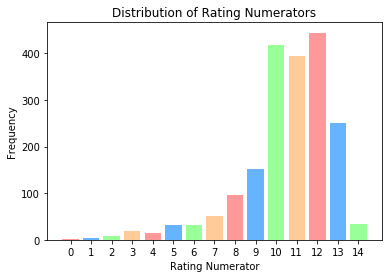

In [80]:
plt.bar(np.arange(15), subset_rating_counts, color=('#ff9999','#66b3ff','#99ff99','#ffcc99'))
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Numerators');

plt.savefig('Most_common_rates.png', bbox_inches='tight')

>Most tweets are given a rating between 10 to 13.

**Q2. Which is the  ost common dogs stages??**

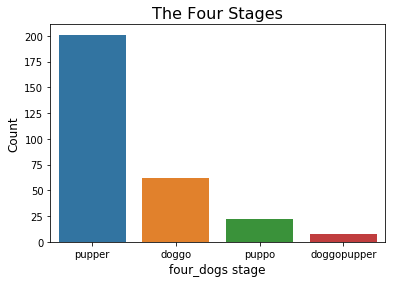

In [81]:
import seaborn as sns
stages_dog = twitter_archive_clean['four_dogs'].value_counts()[1:5].index
sns.countplot(data = twitter_archive_clean, x = 'four_dogs', order = stages_dog)
plt.xlabel('four_dogs stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('The Four Stages',fontsize=16)
plt.savefig('common-stage.png');

**Observation :**
>1. The correlation inbetween both retweets and the fav posts is that if post has been more linked by peoples means it has more visibilty.
2. and the rest result shown in the fig pupper has more visibility than the other. back to back doggo has more visibility than puppo and doggopupper.